In [2]:
import time
import email
import numpy as np

import pandas as pd
pd.options.display.max_rows = 999
pd.set_option('display.max_colwidth', 300)

import os; 
from os import listdir
from os.path import join, isdir

import matplotlib.pyplot as plt

path = "/media/becode/3D_House/Enron/"
folders = ["sent", "sent_items", "_sent_mail"]

### Scrape and DataFrame

In [146]:
abs_start = start = time.time()

users = [user for user in listdir(path) if isdir(join(path, user))]
mails = []

for user in users:
    for folder in folders:
        if folder not in listdir(join(path, user)): continue
        for file in listdir(join(path, user, folder)):
            if isdir(join(path, user, folder, file)): continue
            with open(join(path, user, folder, file), "r", errors="ignore") as text:
                try: mails.append(email.message_from_string(text.read()))
                except: print("BREAKPOINT:", user, folder, file)
                    
    print(f"load {user} mail took", round(time.time() -start, 2), "seconds")
    start = time.time()
print("Total time:", round(time.time() -abs_start, 2), "seconds")

load dickson-s mail took 0.03 seconds
load stclair-c mail took 0.27 seconds
load guzman-m mail took 0.06 seconds
load kuykendall-t mail took 0.09 seconds
load saibi-e mail took 0.01 seconds
load keiser-k mail took 0.08 seconds
load harris-s mail took 0.0 seconds
load lavorato-j mail took 0.36 seconds
load campbell-l mail took 0.15 seconds
load sanchez-m mail took 0.02 seconds
load arnold-j mail took 0.44 seconds
load pimenov-v mail took 0.02 seconds
load fischer-m mail took 0.03 seconds
load sturm-f mail took 0.09 seconds
load weldon-c mail took 0.08 seconds
load shankman-j mail took 0.24 seconds
load ruscitti-k mail took 0.07 seconds
load dean-c mail took 0.01 seconds
load thomas-p mail took 0.04 seconds
load keavey-p mail took 0.03 seconds
load merriss-s mail took 0.0 seconds
load mccarty-d mail took 0.03 seconds
load zufferli-j mail took 0.08 seconds
load davis-d mail took 0.07 seconds
load ward-k mail took 0.19 seconds
load brawner-s mail took 0.07 seconds
load hernandez-j mail too

In [147]:
start = time.time()

df = pd.DataFrame()
df["Content"] = list(map(lambda x: x.get_payload(), mails))

fields = mails[0].keys()
for field in fields:
    df[field] = [mail[field] for mail in mails]
    
print("Took", round(time.time() -start, 2), "seconds")

Took 6.5 seconds


### Sort and save

In [164]:
df["Date"] = pd.to_datetime(df["Date"])

In [193]:
df.sort_values(["X-Origin", "Date"], inplace=True)
df.reset_index(drop=True, inplace= True)

In [198]:
df.to_csv("mails_raw.csv")

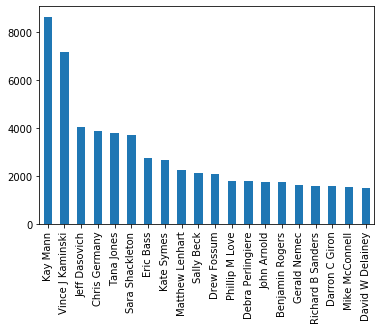

In [172]:
df["X-From"].value_counts()[:20].plot.bar()
plt.show()

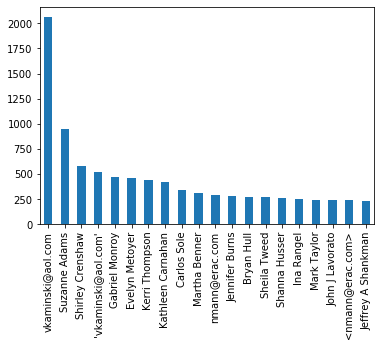

In [173]:
df["X-To"].value_counts()[:20].plot.bar()
plt.show()

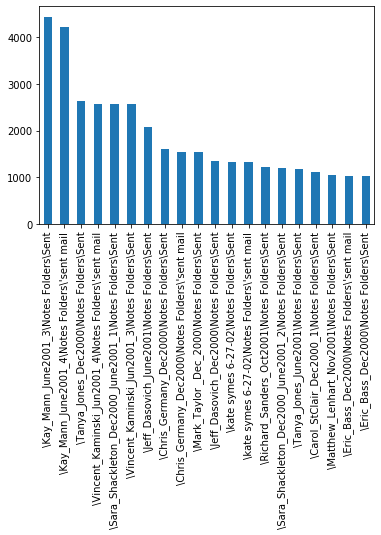

In [174]:
df["X-Folder"].value_counts()[:20].plot.bar()
plt.show()

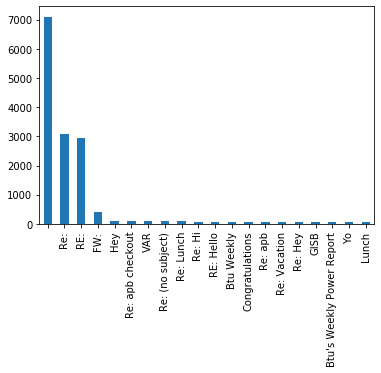

In [175]:
df["Subject"].value_counts()[:20].plot.bar()
plt.show()

In [3]:
df = pd.read_csv("mails_raw.csv", index_col=0)

In [102]:
df.head(1)

,Content,Message-ID,Date,From,To,Subject,Cc,Mime-Version,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,"---------------------- Forwarded by John Arnold/HOU/ECT on 05/10/2001 02:21 \nPM ---------------------------\n\n\n""Schaefer, Matthew"" <MSchaefer@NYMEX.com> on 05/10/2001 10:52:30 AM\nTo: Brad Banky <bbanky@txues.com>, David Rosenberg \n<david.m.rosenberg@enron.com>, George Gero <anthony_gero@pru...",<25702046.1075849632104.JavaMail.evans@thyme>,2001-05-10 07:16:00-07:00,john.arnold@enron.com,mike.maggi@enron.com,Options Advisory Committee Meeting - May 31st,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,John Arnold,Mike Maggi,NaN,NaN,\John_Arnold_Oct2001\Notes Folders\Sent,ARNOLD-J,jarnold.nsf


In [103]:
hey = df[df["Subject"] == "Congratulations"]
idx = 0

In [129]:
print(hey.iloc[idx, 0])
idx += 1

Tim, I appreciate the note and the comments - I may need some of your help in 
the future as we bring this patient back to health.

Regards
Delainey
---------------------- Forwarded by David W Delainey/HOU/ECT on 02/09/2001 
10:41 AM ---------------------------
   
	
	
	From:  Tim Belden                           02/08/2001 09:04 AM
	

To: David W Delainey/HOU/ECT@ECT
cc:  
Subject: Congratulations

As a shareholder I am extremely happy that you are heading over to EES.  
There is a business there.  They just need some help with the execution and 
implementation.  

I'm sorry to see you leave ENA.  The management style that you and John have 
brought to this organization is the best I've seen.  The attention to details 
and teamwork are really impressive.  Personally, I want to say thanks for all 
of the support that you have provided to me and the West Power Team over the 
last year.  Everything from acknowledging our suceessful business model to 
helping us to refine it through impro

In [131]:
df[df["Subject"] == "Congratulations"].shape

(72, 18)

In [137]:
len(df[~pd.isnull(df["X-bcc"]) & df["Cc"] != df["Bcc"]])

125682

In [138]:
import pickle

In [143]:
with open("archive/finance_raw.pkl", 'rb') as file:
    content = file.read()

In [145]:
with open("archive/finance.pkl", 'wb') as file:
    for line in content.splitlines():
        #outsize += len(line) + 1
        file.write(line + str.encode('\n'))

In [146]:
finance = pickle.load(open("archive/finance.pkl", "rb"))

In [150]:
finance = pd.DataFrame(finance).T

In [154]:
finance[finance["poi"]]

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN
COLWELL WESLEY,288542,1758,27610,1490344,NaN,1200000,wes.colwell@enron.com,NaN,-144062,698242,...,240,NaN,40,101740,11,True,NaN,1132,698242,NaN
RIEKER PAULA H,249201,1328,214678,1099100,NaN,700000,paula.rieker@enron.com,NaN,-100000,1918887,...,35,1635238,82,1950,48,True,NaN,1258,283649,NaN
KOPPER MICHAEL J,224305,NaN,NaN,2652612,NaN,800000,michael.kopper@enron.com,NaN,NaN,985032,...,NaN,NaN,NaN,907502,NaN,True,602671,NaN,985032,NaN
SHELBY REX,211844,225,NaN,2003885,NaN,200000,rex.shelby@enron.com,NaN,-4167,2493616,...,13,1624396,39,1573324,14,True,NaN,91,869220,NaN
DELAINEY DAVID W,365163,3093,NaN,4747979,NaN,3000000,david.delainey@enron.com,NaN,NaN,3614261,...,66,2291113,3069,1661,609,True,1294981,2097,1323148,NaN
LAY KENNETH L,1072321,4273,202911,103559793,81525000,7000000,kenneth.lay@enron.com,NaN,-300000,49110078,...,123,34348384,36,10359729,16,True,3600000,2411,14761694,NaN
BOWEN JR RAYMOND M,278601,1858,NaN,2669589,NaN,1350000,raymond.bowen@enron.com,NaN,-833,252055,...,140,NaN,27,1621,15,True,974293,1593,252055,NaN
BELDEN TIMOTHY N,213999,7991,2144013,5501630,NaN,5249999,tim.belden@enron.com,NaN,-2334434,1110705,...,228,953136,484,210698,108,True,NaN,5521,157569,NaN
FASTOW ANDREW S,440698,NaN,NaN,2424083,NaN,1300000,andrew.fastow@enron.com,NaN,-1386055,1794412,...,NaN,NaN,NaN,277464,NaN,True,1736055,NaN,1794412,NaN


In [160]:
import swifter
from textblob import TextBlob

In [164]:
start = time.time()
df.loc[:100000, "Message-ID"].apply(lambda x: TextBlob(x).sentiment)
print("Took", round(time.time()-start, 2), "seconds.")

start = time.time()
df.loc[:100000, "Message-ID"].swifter.apply(lambda x: TextBlob(x).sentiment)
print("Took", round(time.time()-start, 2), "seconds.")

Took 18.04 seconds.



Took 21.34 seconds.


In [187]:
df.loc[0, "Content"]

'---------------------- Forwarded by John Arnold/HOU/ECT on 05/10/2001 02:21 \nPM ---------------------------\n\n\n"Schaefer, Matthew" <MSchaefer@NYMEX.com> on 05/10/2001 10:52:30 AM\nTo: Brad Banky <bbanky@txues.com>, David Rosenberg \n<david.m.rosenberg@enron.com>, George Gero <anthony_gero@prusec.com>, James \nHaupt <jay.haupt@eprime.com>, Jeff Frase <jeff.frase@gs.com>, Jeff Ong \n<glyons@tractabelusa.com>, Jim Adams <james.l.adams@usa.conoco.com>, John \nArnold <jarnold@enron.com>, Kayvan Scott Malek <ksmalek@aep.com>, Mel Mullim \n<fwam@msn.com>, Michael Maggi <mike.maggi@enron.com>, Robert Collins \n<collinsb2@epenergy.com>, Russ Knutsen <rrkn@chevron.com>, Sanjiv Khosla \n<sanjiv.khosla@msdw.com>, William Coorsh <bcoorsh@tractabelusa.com>\ncc:  \nSubject: Options Advisory Committee Meeting - May 31st\n\n\nPlease be advised that there will be a meeting of the Options Advisory\nCommittee on Thursday, May 31, 2001 in Room 1012 on the 10th floor in the\nNYMEX building.  Video confe

In [171]:
blob = TextBlob(df.loc[0, "Content"])

In [195]:
blob.noun_phrases()

[WordList(['Forwarded', 'by', 'John']),
 WordList(['by', 'John', 'Arnold/HOU/ECT']),
 WordList(['John', 'Arnold/HOU/ECT', 'on']),
 WordList(['Arnold/HOU/ECT', 'on', '05/10/2001']),
 WordList(['on', '05/10/2001', '02:21']),
 WordList(['05/10/2001', '02:21', 'PM']),
 WordList(['02:21', 'PM', 'Schaefer']),
 WordList(['PM', 'Schaefer', 'Matthew']),
 WordList(['Schaefer', 'Matthew', 'MSchaefer']),
 WordList(['Matthew', 'MSchaefer', 'NYMEX.com']),
 WordList(['MSchaefer', 'NYMEX.com', 'on']),
 WordList(['NYMEX.com', 'on', '05/10/2001']),
 WordList(['on', '05/10/2001', '10:52:30']),
 WordList(['05/10/2001', '10:52:30', 'AM']),
 WordList(['10:52:30', 'AM', 'To']),
 WordList(['AM', 'To', 'Brad']),
 WordList(['To', 'Brad', 'Banky']),
 WordList(['Brad', 'Banky', 'bbanky']),
 WordList(['Banky', 'bbanky', 'txues.com']),
 WordList(['bbanky', 'txues.com', 'David']),
 WordList(['txues.com', 'David', 'Rosenberg']),
 WordList(['David', 'Rosenberg', 'david.m.rosenberg']),
 WordList(['Rosenberg', 'david.m.

In [260]:
from profanityfilter import ProfanityFilter
from textblob.sentiments import NaiveBayesAnalyzer
pf = ProfanityFilter()

In [209]:
profanity = df.loc[:len(df)//1000][df.loc[:len(df)//1000, "Content"].swifter.apply(lambda x: pf.is_profane(x))]

In [219]:
profanity.drop(columns=[c for c in profanity.columns if c != "Content"], inplace = True)
profanity.reset_index(inplace=True)
profanity["Blob"] = profanity["Content"].apply(lambda x: TextBlob(x))

In [253]:
pf.censor(profanity.loc[2, "Content"])

'Stephane,\n\n Can you create an e-mail list to distribute your reports everyday to the \nwest desk?\nOr put them on a common drive?  We can do the same with our reports.   List \nshould include:\n\n Phillip Allen\n Mike Grigsby\n Keith Holst\n Frank Ermis\n Steve South\n Janie Tholt\n Tory Kuykendall\n Matt Lenhart\n Randy ***\n\nThanks.\n\nPhillip'

In [255]:
for sentence in profanity.loc[2, "Blob"].title():
    print(sentence)

S
t
e
p
h
a
n
e
,




 
C
a
n
 
Y
o
u
 
C
r
e
a
t
e
 
A
n
 
E
-
M
a
i
l
 
L
i
s
t
 
T
o
 
D
i
s
t
r
i
b
u
t
e
 
Y
o
u
r
 
R
e
p
o
r
t
s
 
E
v
e
r
y
d
a
y
 
T
o
 
T
h
e
 


W
e
s
t
 
D
e
s
k
?


O
r
 
P
u
t
 
T
h
e
m
 
O
n
 
A
 
C
o
m
m
o
n
 
D
r
i
v
e
?
 
 
W
e
 
C
a
n
 
D
o
 
T
h
e
 
S
a
m
e
 
W
i
t
h
 
O
u
r
 
R
e
p
o
r
t
s
.
 
 
 
L
i
s
t
 


S
h
o
u
l
d
 
I
n
c
l
u
d
e
:




 
P
h
i
l
l
i
p
 
A
l
l
e
n


 
M
i
k
e
 
G
r
i
g
s
b
y


 
K
e
i
t
h
 
H
o
l
s
t


 
F
r
a
n
k
 
E
r
m
i
s


 
S
t
e
v
e
 
S
o
u
t
h


 
J
a
n
i
e
 
T
h
o
l
t


 
T
o
r
y
 
K
u
y
k
e
n
d
a
l
l


 
M
a
t
t
 
L
e
n
h
a
r
t


 
R
a
n
d
y
 
G
a
y




T
h
a
n
k
s
.




P
h
i
l
l
i
p


In [ ]:
TextBlob().raw_sentences
TextBlob().title
TextBlob().tags
TextBlob().sentiment
TextBlob().subjectivity
TextBlob().sentences

In [263]:
sent = df[df["Subject"] == "Congratulations"]["Content"].swifter.apply(
    lambda x: TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment)

In [272]:
sent[sent.apply(lambda x: x[0] == "neg")]

9123      (neg, 0.4875285850868415, 0.5124714149131574)
9124      (neg, 0.4875285850868415, 0.5124714149131574)
51337    (neg, 0.40140596795884254, 0.5985940320411585)
51338    (neg, 0.40140596795884254, 0.5985940320411585)
51385    (neg, 0.23009297943876672, 0.7699070205612332)
51386    (neg, 0.23009297943876672, 0.7699070205612332)
51397    (neg, 0.45890694063839343, 0.5410930593616077)
51399    (neg, 0.45890694063839343, 0.5410930593616077)
51808    (neg, 0.43893129770992384, 0.5610687022900761)
51809    (neg, 0.43893129770992384, 0.5610687022900761)
Name: Content, dtype: object

In [275]:
df.loc[51399, "Content"]

'Rick,\n\nCongratulations. Well deserved.\n\nVince'

Content                      Cool !\n\n\n\n   \n\t\n\t\n\tFrom:  Jeff Bartlett                           02/07/2001 03:16 PM\n\t\n\nTo: Martin Bucknell/Enron@EnronXGate\ncc:  (bcc: Harry Arora/HOU/ECT)\n\nSubject: Enron Flat Panel Procurement\n\nJust left you a voicemail, but thought I would follow up with an email \nsummar...
Message-ID                                                                                                                                                                                                                                                                                 <31476896.1075848347405.JavaMail.evans@thyme>
Date                                                                                                                                                                                                                                                                                                           2001-02-07 07:50:00-08:00
From         

In [266]:
sub_sent = df.loc[:100, "Subject"].swifter.apply(lambda x: TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment)

In [481]:
import spacy

eng = spacy.load("en")


OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [ ]:
idx = 0

In [419]:
print(df.loc[idx, "Content"])
idx +=1 

Kay & Neal,

Thanks for remembering my birthday.  You beat my parents by one day.  

The family is doing fine.  Grace is really smiling.  She is a very happy baby 
as long as she is being held.

It sounds like your house is coming along fast.  I think my folks are ready 
to start building.  

We will probably visit in late June or July.  May is busy.  We are taking the 
kids to Disney for their birthdays.

Good luck on the house.

Keith


In [428]:
test = df.loc[[94,140,165], "Content"].to_frame()
test.reset_index(inplace=True)
test["Blob"] = test["Content"].apply(lambda x: TextBlob(x))
test["Naive"] = test["Content"].apply(lambda x: TextBlob(x, analyzer=NaiveBayesAnalyzer()))

In [432]:
test.loc[0, "Blob"].tokens

WordList(['$', '100', 'for', 'the', 'yard', 'seems', 'like', 'enough', 'for', 'up', 'to', '12.5', 'hours', '.', 'How', 'long', 'did', 'it', 'take', 'him', '?', 'I', 'think', '$', '100', 'should', 'be', 'enough', '.', 'Use', 'Page', 'Setup', 'under', 'the', 'File', 'menu', 'to', 'change', 'from', 'Portrait', 'to', 'Landscape', 'if', 'you', 'want', 'to', 'change', 'from', 'printing', 'vertically', 'to', 'printing', 'horizontally', '.', 'Also', 'try', 'selecting', 'Fit', 'to', 'one', 'page', 'if', 'you', 'want', 'your', 'print', 'out', 'to', 'be', 'on', 'only', 'one', 'page', '.', 'Use', 'Print', 'preview', 'to', 'see', 'what', 'your', 'print', 'out', 'will', 'look', 'like', 'before', 'you', 'print', '.', 'The', 'truck', 'might', 'need', 'new', 'sparkplugs', 'at', 'around', '120,000-125,000', 'miles', '.', 'A', 'valve', 'adjustment', 'might', 'do', 'some', 'good', '.', 'It', 'has', 'idled', 'very', 'high', 'for', 'the', 'last', '25,000', 'miles', ',', 'but', 'it', 'has', 'never', 'broken'

### 94, 140 & 165

In [472]:
lst = df[df["Content"].apply(lambda x: "Lou Pai" in x)].index

In [497]:
stock = pd.read_csv("stockprices.csv", index_col=0)
stock

,Date,Open,High,Low,Close,Volume,Change,Change%
0,2001-12-31,0.57,0.60,0.55,0.60,20252400,0.000,0.000
1,2001-12-28,0.60,0.61,0.56,0.60,18229800,0.000,0.000
2,2001-12-27,0.66,0.68,0.56,0.60,26312100,0.050,-7.692
3,2001-12-26,0.67,0.74,0.65,0.65,32034600,0.000,0.000
4,2001-12-24,0.60,0.65,0.57,0.65,18803600,0.120,22.642
...,...,...,...,...,...,...,...,...
997,1998-01-08,19.50,19.50,19.10,19.25,1141700,0.250,-1.282
998,1998-01-07,19.25,19.50,19.10,19.50,1680800,0.125,0.645
999,1998-01-06,19.75,19.85,19.07,19.38,2035500,0.625,-3.125
1000,1998-01-05,20.28,20.60,19.82,20.00,985400,0.375,-1.840


In [479]:
start = time.time()
blobs = df.loc[lst, "Content"].apply(lambda x: TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment)
print(time.time() -start)

179.24095058441162


In [480]:
list(map(lambda x: x.sentiment, blobs))

AttributeError: 'Sentiment' object has no attribute 'sentiment'

In [498]:
df

,Content,Message-ID,Date,From,To,Subject,Cc,Mime-Version,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,"---------------------- Forwarded by John Arnold/HOU/ECT on 05/10/2001 02:21 \nPM ---------------------------\n\n\n""Schaefer, Matthew"" <MSchaefer@NYMEX.com> on 05/10/2001 10:52:30 AM\nTo: Brad Banky <bbanky@txues.com>, David Rosenberg \n<david.m.rosenberg@enron.com>, George Gero <anthony_gero@pru...",<25702046.1075849632104.JavaMail.evans@thyme>,2001-05-10 07:16:00-07:00,john.arnold@enron.com,mike.maggi@enron.com,Options Advisory Committee Meeting - May 31st,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,John Arnold,Mike Maggi,NaN,NaN,\John_Arnold_Oct2001\Notes Folders\Sent,ARNOLD-J,jarnold.nsf
1,David:\nDo you have a simulation set up that will allow me to simulate trades by \npushing a buy or sell button and will move the two way so i can try \nsimulating actual market cicumstances?\n\n\nFrom: David Forster/ENRON@enronXgate on 05/08/2001 09:55 AM\nTo: John Arnold/HOU/ECT@ECT\ncc: Savit...,<28095741.1075849632148.JavaMail.evans@thyme>,2001-05-13 07:52:00-07:00,john.arnold@enron.com,david.forster@enron.com,Re:,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,John Arnold,David Forster,NaN,NaN,\John_Arnold_Oct2001\Notes Folders\Sent,ARNOLD-J,jarnold.nsf
2,"Yolanda\n\nI will be attending the ski outing - I am not sure about my arrival and \ndeparture dates, but I did put tentative dates. Once I make my bookings I \nwill update you on my final dates. I might stay an extra day, and will pick \nthat up. Thanks\n\n\nHarry\n\n\n",<3676806.1075848347249.JavaMail.evans@thyme>,2000-12-15 03:44:00-08:00,harry.arora@enron.com,yolanda.roberts@enron.com,Re: Aspen,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,Harry Arora,Yolanda Roberts,NaN,NaN,\Harpreet_Arora_Nov2001\Notes Folders\Sent,ARORA-H,harora.nsf
3,"Suresh\n\nFor the next two weeks, I'd like you to focus on the following.\n\n1. Development frame-work and getting Zach upto speed\n Specs for Syndication report & testing & production date\n Finalize questionnaire and production date\n Modifications to Invitee and User stats\n2. EnronOnline auc...",<22378087.1075848347271.JavaMail.evans@thyme>,2001-01-05 08:24:00-08:00,harry.arora@enron.com,suresh.raghavan@enron.com,Tasks,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,Harry Arora,Suresh Raghavan,NaN,NaN,\Harpreet_Arora_Nov2001\Notes Folders\Sent,ARORA-H,harora.nsf
4,Dave\n\nFind enclosed the business plan and the valuation model for DealBench. Feel \nfree to call me with questions.\n\n\n\n\n\n\nHarry Arora,<30442669.1075848347294.JavaMail.evans@thyme>,2001-01-22 10:36:00-08:00,harry.arora@enron.com,dave.samuels@enron.com,Business Plan,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,Harry Arora,Dave Samuels,NaN,NaN,\Harpreet_Arora_Nov2001\Notes Folders\Sent,ARORA-H,harora.nsf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125677,"\n\n -----Original Message-----\nFrom: \tWhiting, Greg \nSent:\tFriday, December 07, 2001 3:01 PM\nTo:\tZipper, Andy\nCc:\tHodges, Georgeanne\nSubject:\tCOF Curves for Andy Zipper.xls\n\nAndy,\n\nHere is the curves that were used to calc the 9/30 Cost of Funds for EWS.\n\n\t\t\t\tGreg x35399\n\n",<23879799.1075859061488.JavaMail.evans@thyme>,2001-12-10 06:36:33-08:00,andy.zipper@enron.com,david.oconnor@ubsw.com,FW: COF Curves for Andy Zipper.xls,NaN,1.0,text/plain; charset=us-ascii,7bit,NaN,"Zipper, Andy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=AZIPPER>",'david.oconnor@ubsw.com',NaN,NaN,"\Andrew_Zipper_Jan2002\Zipper, Andy\Sent Items",Zipper-A,azipper (Non-Privileged).pst
125678,"\n\n--------- Inline attachment follows ---------\n\nFrom: </O=ENRON/OU=NA/CN=RECIPIENTS/CN=AZIPPER>\nTo: 'david.oconnor@ubsw.com'\nDate: Monday, December 10, 2001 2:36:33 GMT\nSubject: \n\n\n\n -----Original Message-----\nFrom: \tWhiting, Greg \nSent:\tFriday, December 07, 2001 3:01 PM\nT...",<3235534.1075859061510.JavaMail.evans@thyme>,2001-12-10 09:01:09-08:00,andy.zi